## Import libraries and data

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import squarify

In [61]:
#set graphs size
plt.rcParams['figure.figsize'] = [6, 4]

In [36]:
df_digital_final = pd.read_csv("clean_data/df_dig_clean.csv", index_col=0)
df_products_final = pd.read_csv("clean_data/Product_clustered.csv", index_col=0)
df_demographics = pd.read_csv("clean_data/demo_clean.csv", index_col=0)

In [37]:
df_digital_final.columns

Index(['Email_Clicks', 'SM_Comments', 'App_Clicks', 'SM_Likes', 'SM_Shares',
       'SM_Clicks', 'cluster'],
      dtype='object')

In [38]:
#changfe cluster column name
df_digital_final.columns = ['Email_Clicks', 'SM_Comments', 'App_Clicks', 'SM_Likes', 'SM_Shares',
       'SM_Clicks', 'digital_cluster']
df_digital_final.columns

Index(['Email_Clicks', 'SM_Comments', 'App_Clicks', 'SM_Likes', 'SM_Shares',
       'SM_Clicks', 'digital_cluster'],
      dtype='object')

In [40]:
df_products_final.columns

Index(['fitness_gym', 'hiking_running', 'teamgames', 'outdooractivities',
       'totalproducts', 'Avg_Spent', 'Days_Since_Last_Purchase',
       'cluster_label'],
      dtype='object')

In [41]:
df_products_final.columns = ['fitness_gym', 'hiking_running', 'teamgames', 'outdooractivities',
       'totalproducts', 'Avg_Spent', 'Days_Since_Last_Purchase',
       'products_cluster']
df_products_final.columns

Index(['fitness_gym', 'hiking_running', 'teamgames', 'outdooractivities',
       'totalproducts', 'Avg_Spent', 'Days_Since_Last_Purchase',
       'products_cluster'],
      dtype='object')

In [42]:
df_demographics.columns

Index(['education_level', 'dependents', 'city', 'age', 'sex'], dtype='object')

## Merge two Cluster DFs

- merged_dfs['cluster'] from Digital  
- merged_dfs['cluster_label'] from Products

In [43]:
merged_dfs = pd.merge(df_digital_final,df_products_final,on='Cust_ID')

In [45]:
merged_dfs['cluster_id'] = merged_dfs['digital_cluster'].astype(str) + merged_dfs['products_cluster'].astype(str)

In [46]:
len(merged_dfs)

3936

In [47]:
#merge with Demographic
merged_dfs = pd.merge(merged_dfs,df_demographics,on='Cust_ID')

In [48]:
merged_dfs

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks,digital_cluster,fitness_gym,hiking_running,teamgames,...,totalproducts,Avg_Spent,Days_Since_Last_Purchase,products_cluster,cluster_id,education_level,dependents,city,age,sex
Cust_ID,,,,,,,,,,,,,,,,,,,,,
4,72,1,7,7,1,73,1,0,76,248,...,6,61,69,2,12,Master,True,other,22,male
5,15,20,1,35,15,16,0,0,75,248,...,6,60,71,2,02,High School,False,Birmingham,30,female
6,9,7,3,73,19,10,0,6,69,215,...,5,65,73,2,02,PhD,True,other,19,female
9,67,0,2,0,1,101,1,36,71,248,...,8,49,75,2,12,High School,False,other,21,male
10,38,0,1,9,0,56,1,8,97,204,...,5,69,73,2,12,less than high school,False,other,22,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,13,14,1,83,22,13,0,29,36,53,...,4,38,83,0,00,Bachelor,False,other,29,female
6491,17,13,2,22,21,7,0,38,32,136,...,5,48,87,0,00,Master,False,other,28,male
6492,34,1,2,1,2,53,1,29,39,93,...,5,39,82,0,10,High School,False,Birmingham,20,male


## Explore data

### look at size of clusters

In [49]:
merged_dfs.groupby('cluster_id')['cluster_id'].count()

cluster_id
00    753
01    605
02    518
10    494
11    368
12    360
20    345
21    258
22    235
Name: cluster_id, dtype: int64

- All clusters have reasonable size: 235 to 753  
- merging is not a priority now.

In [50]:
#cluster groups
cluster_groups = merged_dfs.groupby('cluster_id')

### For categorical variables, find the mode ('education_level', 'city', 'sex')

In [55]:
categorical_columns = ['education_level', 'city', 'sex']


In [53]:
for column in categorical_columns:
    mode_df = merged_dfs.groupby('cluster_id')[column].agg(lambda x: x.mode()[0]).reset_index()
    print(f"Most common {column} per cluster:")
    print(mode_df)
    print("\n")  # Print a new line for better readability

Most common education_level per cluster:
  cluster_id education_level
0         00        Bachelor
1         01     High School
2         02     High School
3         10     High School
4         11     High School
5         12     High School
6         20        Bachelor
7         21     High School
8         22     High School


Most common city per cluster:
  cluster_id   city
0         00  other
1         01  other
2         02  other
3         10  other
4         11  other
5         12  other
6         20  other
7         21  other
8         22  other


Most common sex per cluster:
  cluster_id     sex
0         00  female
1         01  female
2         02  female
3         10    male
4         11    male
5         12    male
6         20    male
7         21    male
8         22    male




- Almost everyone is mostly High School
- P0 is higher education
- D0 are female (D1 and D2 are male)

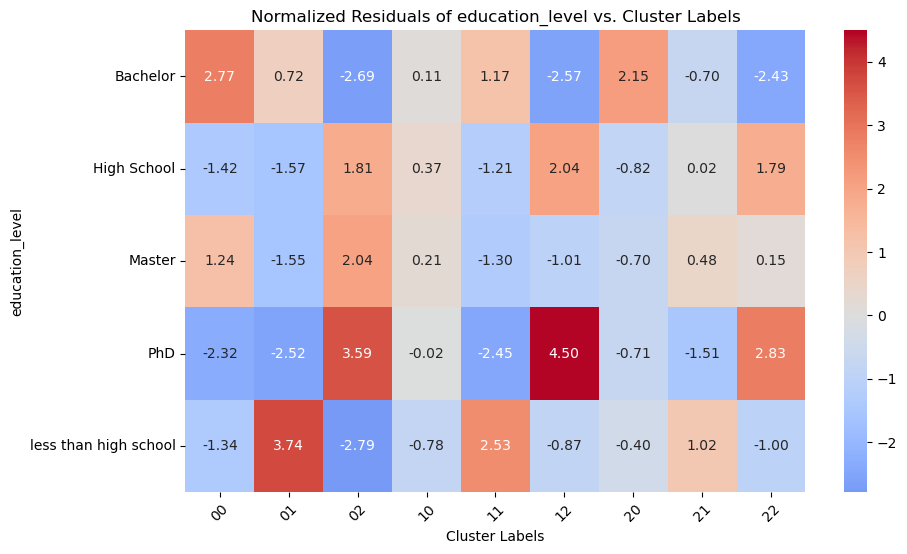

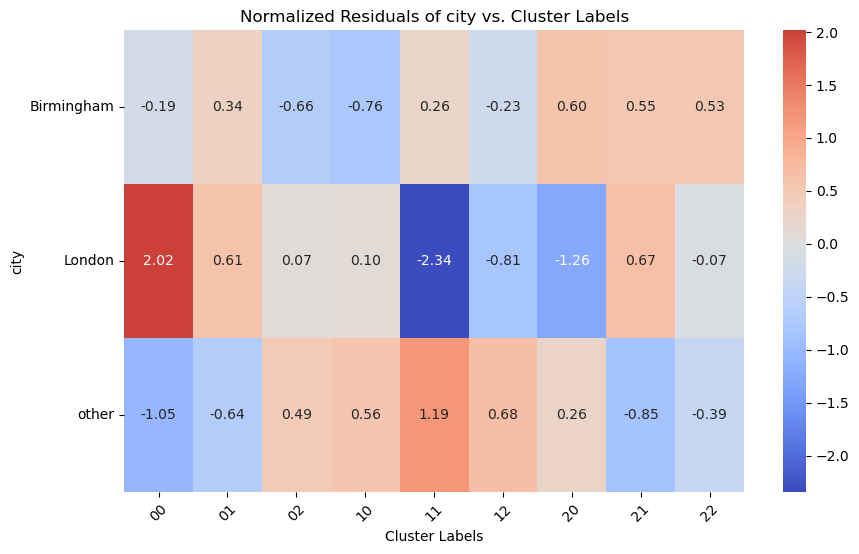

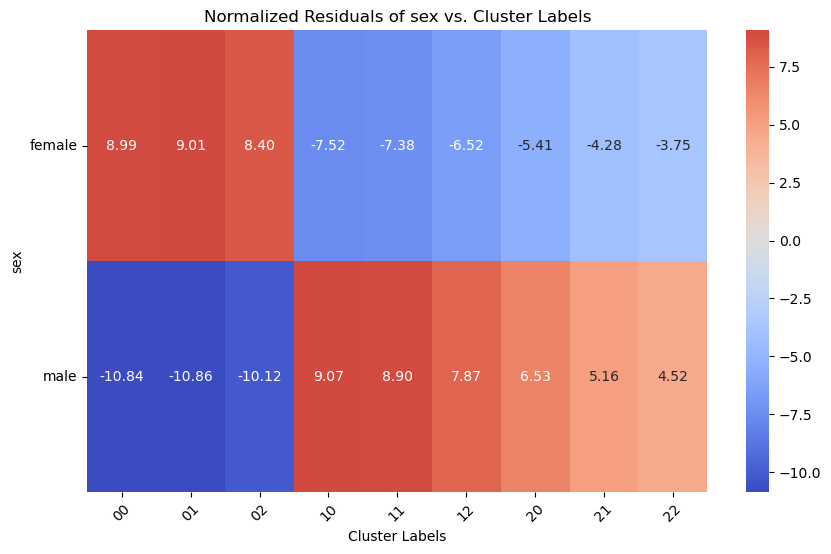

In [58]:
#Contingency tables (relative values)
for column in categorical_columns:
    # Create a contingency table for each categorical variable against clusters
    contingency_table = pd.crosstab(merged_dfs[column], merged_dfs['cluster_id'])
    
    # Perform chi-square test to get expected frequencies
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate the residuals (observed - expected)
    residuals = contingency_table - expected
    
    # Normalize residuals by expected frequencies
    normalized_residuals = residuals / np.sqrt(expected)
    
    # Plotting a heatmap of the normalized residuals
    plt.figure(figsize=(10, 6))
    sns.heatmap(normalized_residuals, annot=True, cmap="coolwarm", fmt=".2f", center=0)
    plt.title(f'Normalized Residuals of {column} vs. Cluster Labels')
    plt.xlabel('Cluster Labels')
    plt.ylabel(column)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45)
    plt.show()

**Education**  
- P2 are more likely PhDs
- P1 mostly Less than high school
- P0 mostly bachelor
  
**City**
- 00 are likely from London
- 11 unlikely from London
  
**Sex**
- D0 are **very likely** female
- all others are male

### For numerical variables, calculate the mean or median ('age')

In [62]:
# Analyzing numerical variables: 'age'
mean_age_df = merged_dfs.groupby('cluster_id')['age'].mean().reset_index()
print("Average age per cluster:")
print(mean_age_df)

Average age per cluster:
  cluster_id        age
0         00  28.565737
1         01  28.727273
2         02  29.223938
3         10  40.688259
4         11  42.725543
5         12  41.688889
6         20  38.078261
7         21  38.007752
8         22  36.761702


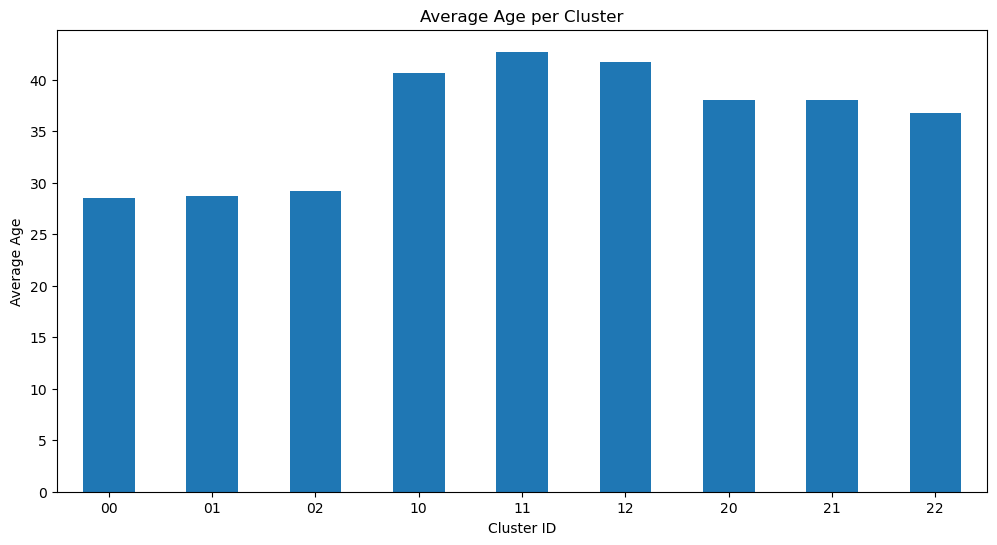

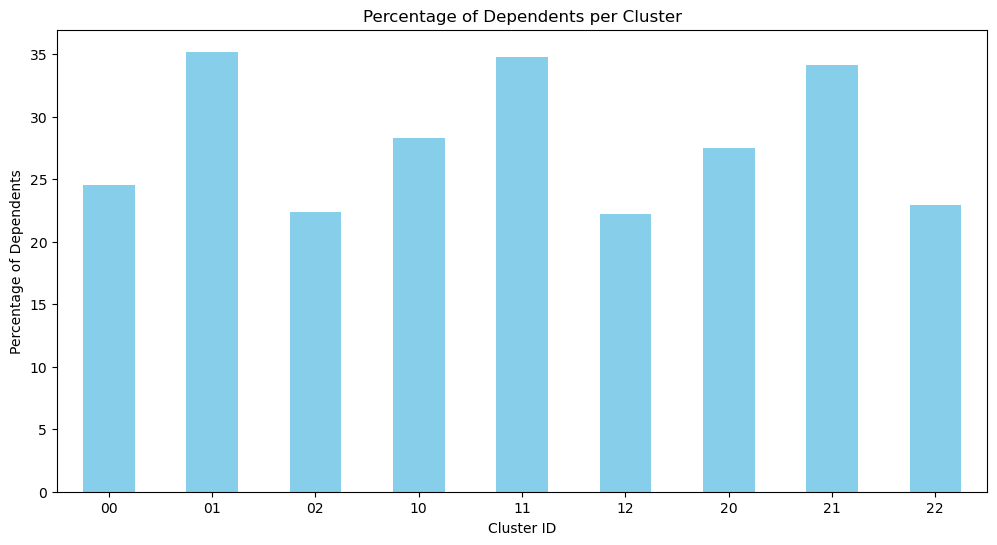

In [63]:
plt.figure(figsize=(12, 6))
cluster_characteristics['age'].plot(kind='bar')
plt.title('Average Age per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.show()

# For binary variables like 'dependents', it may be useful to visualize as a percentage
plt.figure(figsize=(12, 6))
(cluster_characteristics['dependents'] * 100).plot(kind='bar', color='skyblue')
plt.title('Percentage of Dependents per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Percentage of Dependents')
plt.xticks(rotation=0)
plt.show()


- D1 older (above 41-43) > D2 (37-35) > D0 (29)
- P1 more likely to have children (34-35%) > P0 (25-28%) > P2 (22-23)

### For binary variables, calculate the percentage of 'True' values ('dependents')

In [64]:
percentage_dependents_df = merged_dfs.groupby('cluster_id')['dependents'].mean().reset_index()
percentage_dependents_df['dependents'] = percentage_dependents_df['dependents'] * 100  # Convert to percentage
print("Percentage of dependents per cluster:")
print(percentage_dependents_df)

Percentage of dependents per cluster:
  cluster_id  dependents
0         00   24.568393
1         01   35.206612
2         02   22.393822
3         10   28.340081
4         11   34.782609
5         12   22.222222
6         20   27.536232
7         21   34.108527
8         22   22.978723


## Cluster proximity analysis

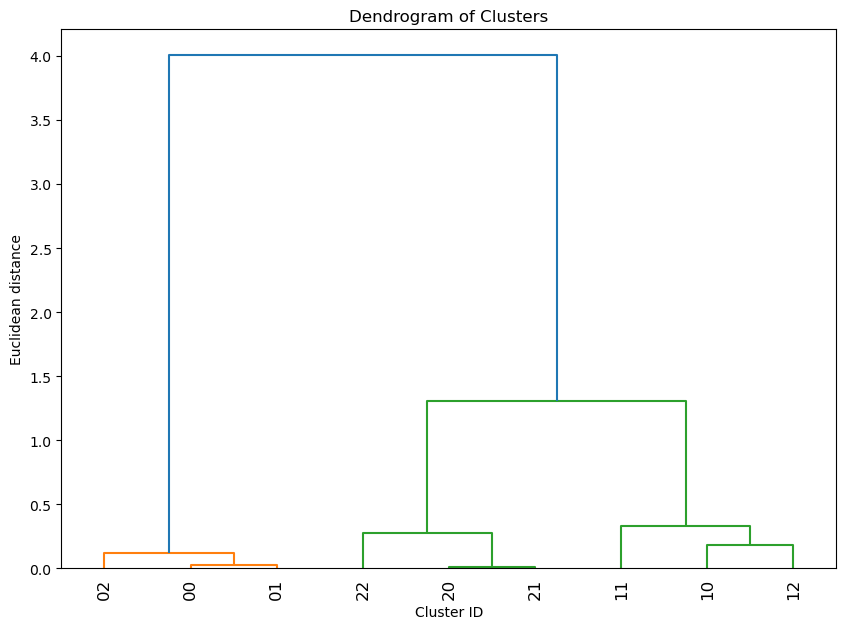

In [67]:
# Step 1: Filter only numeric columns for aggregation
numeric_columns = df_demographics.select_dtypes(include=[np.number]).columns
cluster_means = merged_dfs.groupby('cluster_id')[numeric_columns].mean()

# Step 2: Standardize the data
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_means)

# Step 3: Hierarchical clustering
linked = linkage(cluster_scaled, method='ward')

# Step 4: Visualize with a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=cluster_means.index, leaf_rotation=90)
plt.title('Dendrogram of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('Euclidean distance')
plt.show()

In [59]:
df_demographics.columns

Index(['education_level', 'dependents', 'city', 'age', 'sex'], dtype='object')

## Treemap

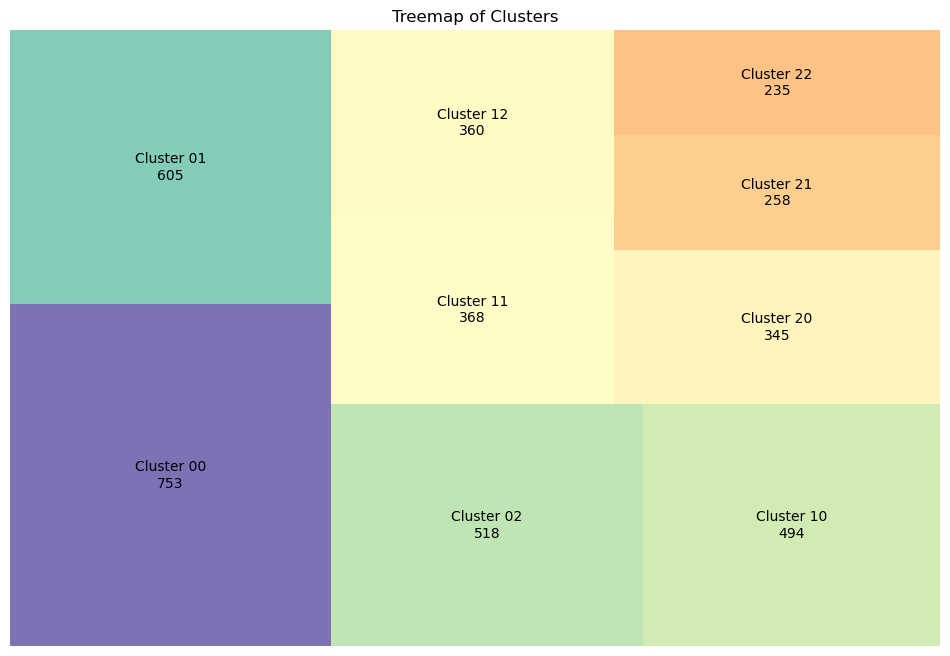

In [72]:
# Example: Assume we are using 'age' as a variable to dictate the size. This could be a sum or count of members.
cluster_sizes = merged_dfs.groupby('cluster_id')['age'].count()  # Or .sum() or another relevant aggregation

# Normalize sizes for better visualization
sizes = cluster_sizes.values
labels = [f"Cluster {idx}\n{size}" for idx, size in zip(cluster_sizes.index, sizes)]

# Color based on the number of members maybe or any other criterion
colors = plt.cm.Spectral(cluster_sizes.values / max(cluster_sizes.values))

# Create a treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.title('Treemap of Clusters')
plt.axis('off')  # Remove axes
plt.show()

In [75]:
proportions = {}
for column in df_demographics.columns:
    # Get the count of each category in each cluster
    count = merged_dfs.groupby(['cluster_id', column]).size().unstack(fill_value=0)
    # Calculate the proportion of each category in each cluster
    proportions[column] = count.div(count.sum(axis=1), axis=0)

# Plot stacked bar chart for each feature
fig, axes = plt.subplots(len(df_demographics), 1, figsize=(10, 5 * len(df_demographics)))

for i, (feature, proportion_df) in enumerate(proportions.items()):
    proportion_df.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Proportion of {feature} within each cluster')
    axes[i].set_xlabel('Cluster ID')
    axes[i].set_ylabel('Proportion')

# Adjust layout
plt.tight_layout()
plt.show()

ValueError: Image size of 1000x2000000 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x0000017B7CB55120> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1000x2000000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1000x2000000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x2e+06 with 4000 Axes>